=== LogReg_l1_C0.01 ===
F1 Score (Train): 0.5464
F1 Score (Test) : 0.5773
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



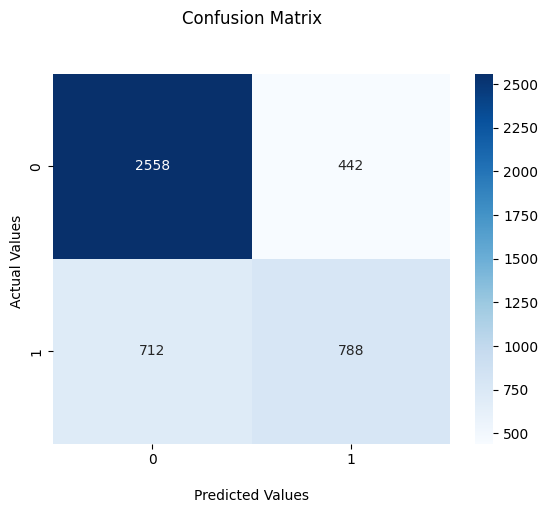

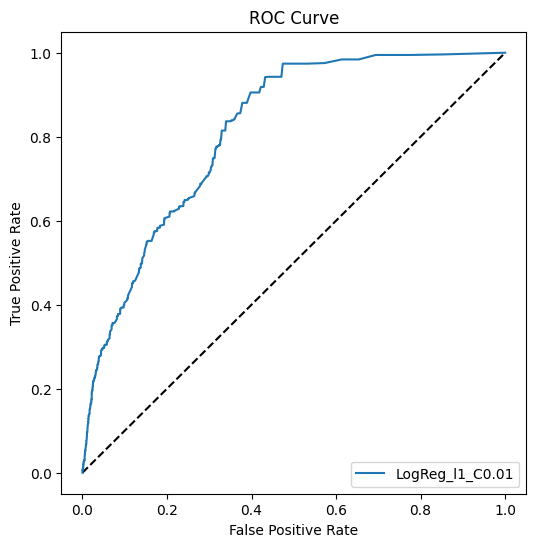

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_12976\2834374247.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


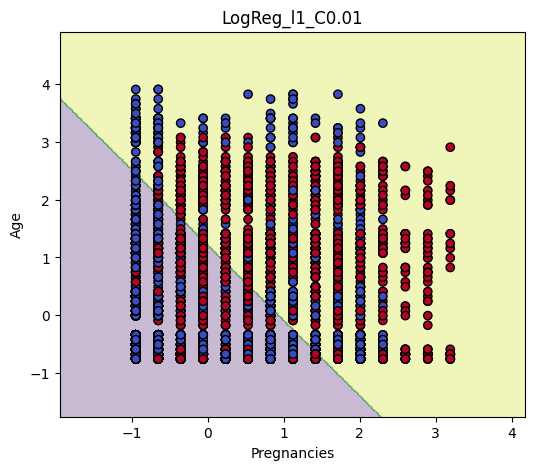

=== LogReg_l1_C0.1 ===
F1 Score (Train): 0.5469
F1 Score (Test) : 0.5809
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



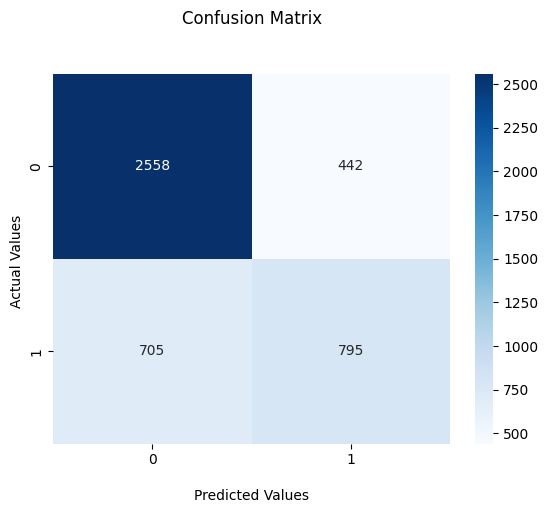

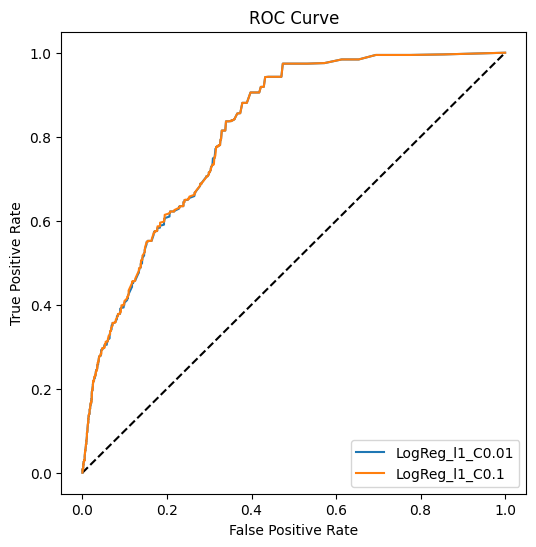

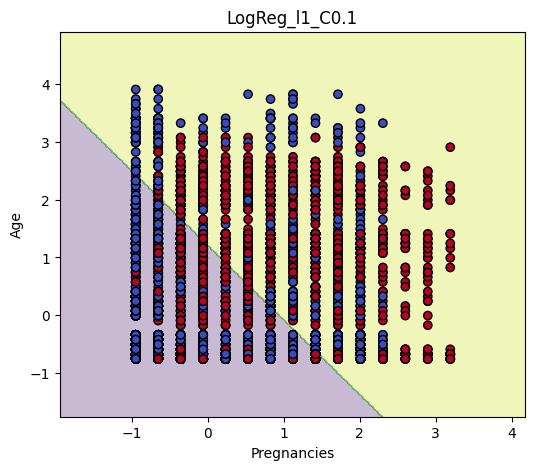

=== LogReg_l1_C1 ===
F1 Score (Train): 0.5469
F1 Score (Test) : 0.5809
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



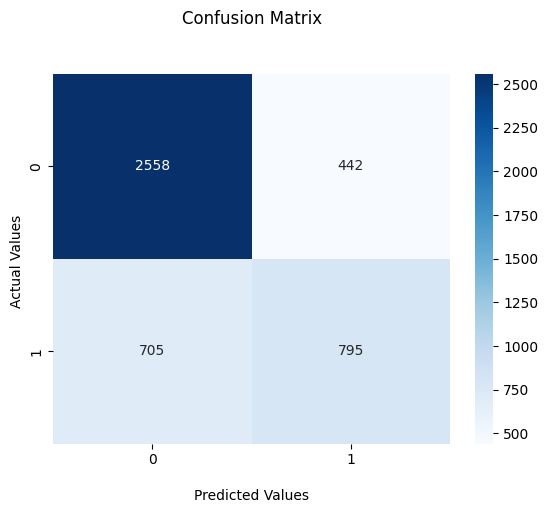

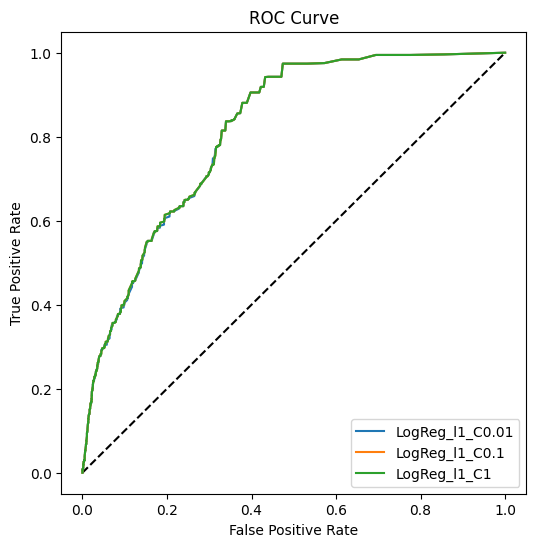

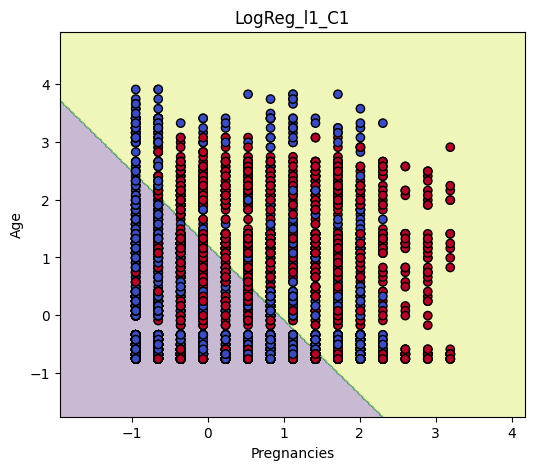

=== LogReg_l1_C10 ===
F1 Score (Train): 0.5469
F1 Score (Test) : 0.5809
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



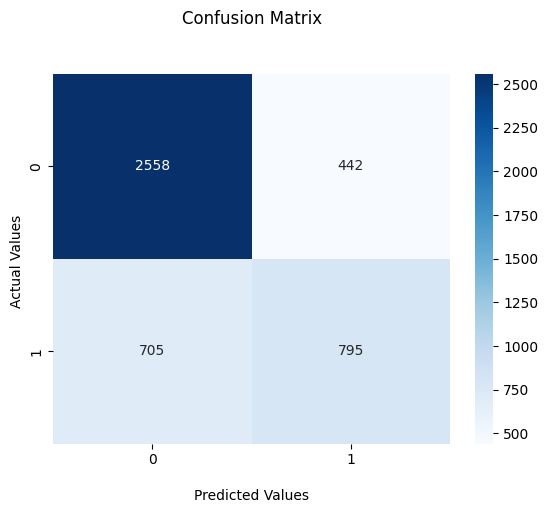

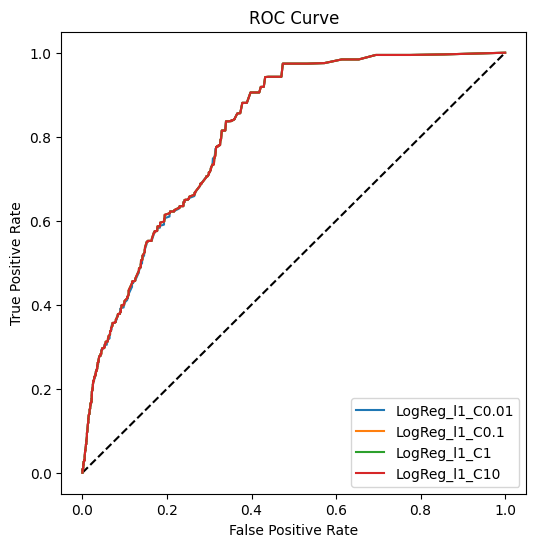

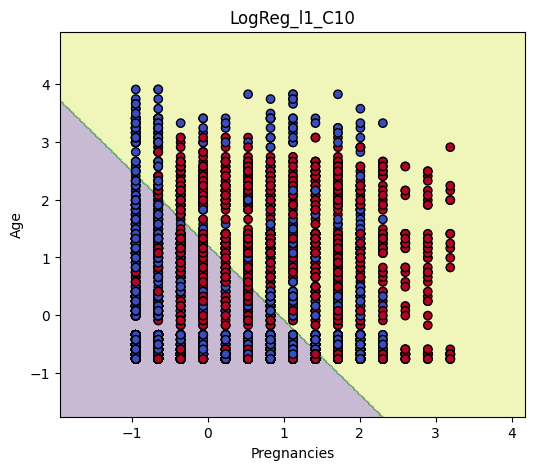

=== LogReg_l2_C0.01 ===
F1 Score (Train): 0.5368
F1 Score (Test) : 0.5675
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



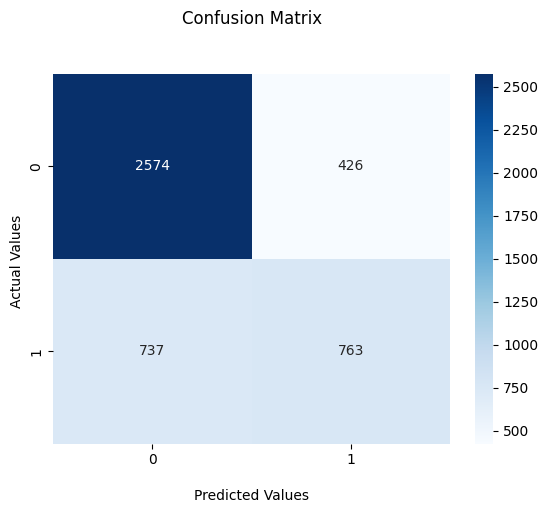

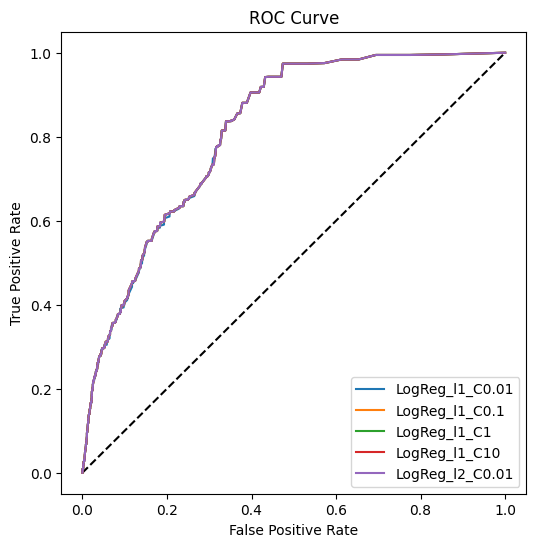

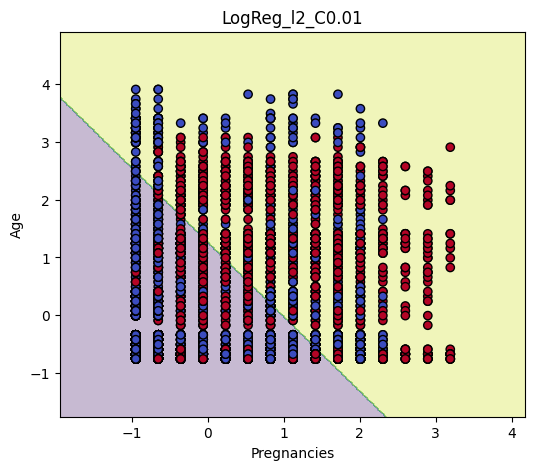

=== LogReg_l2_C0.1 ===
F1 Score (Train): 0.5464
F1 Score (Test) : 0.5773
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



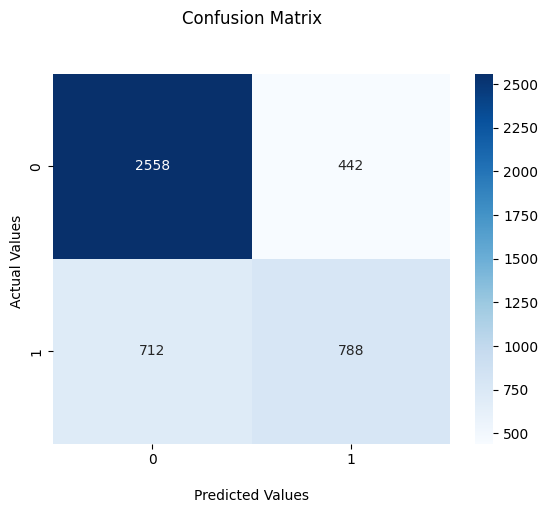

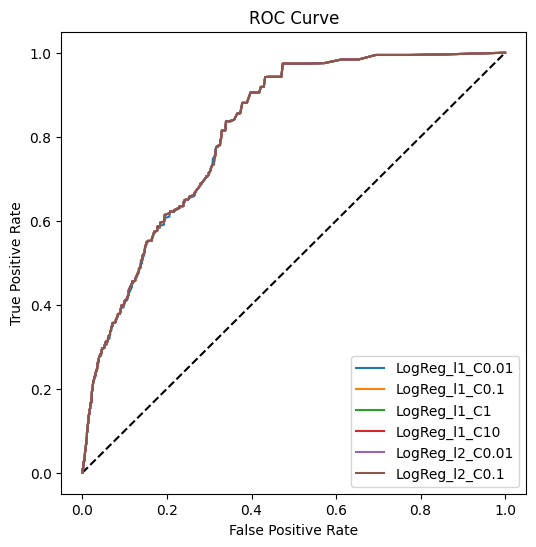

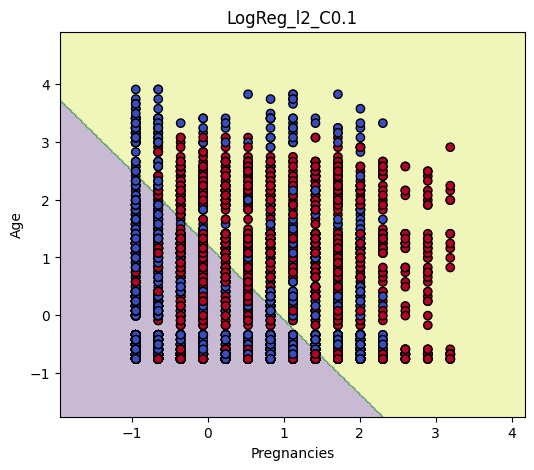

=== LogReg_l2_C1 ===
F1 Score (Train): 0.5469
F1 Score (Test) : 0.5809
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



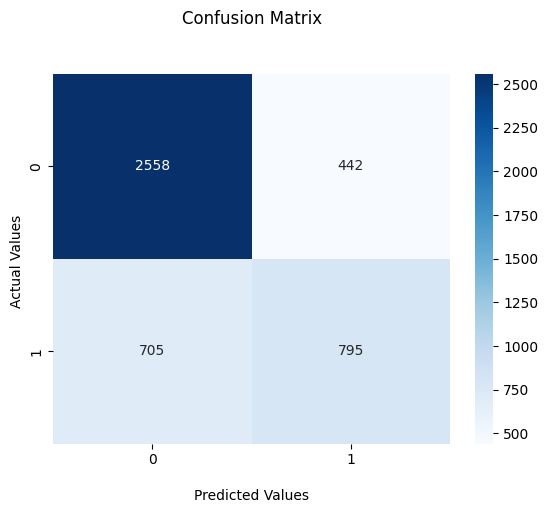

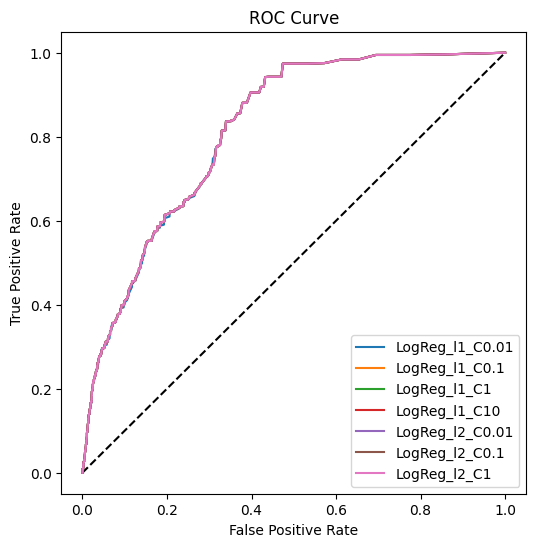

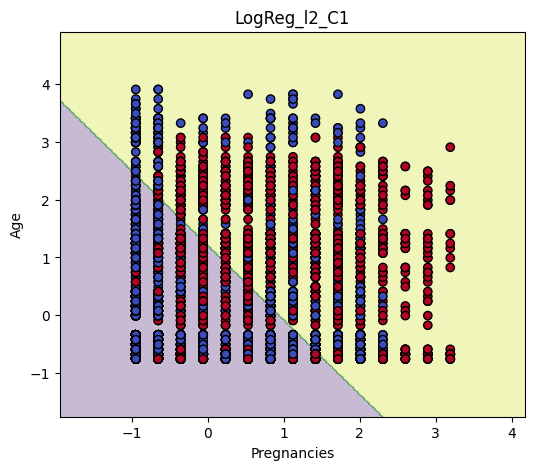

=== LogReg_l2_C10 ===
F1 Score (Train): 0.5469
F1 Score (Test) : 0.5809
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



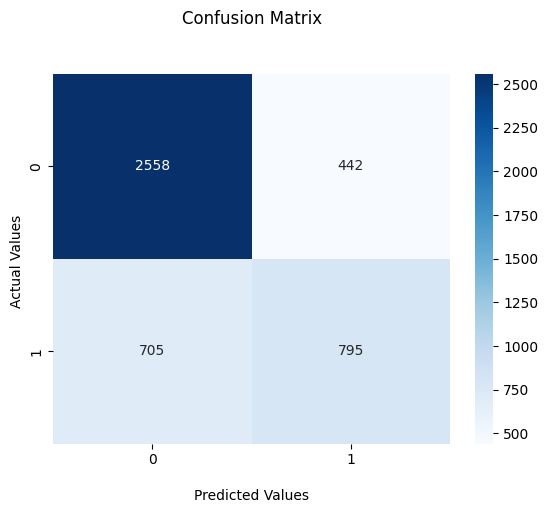

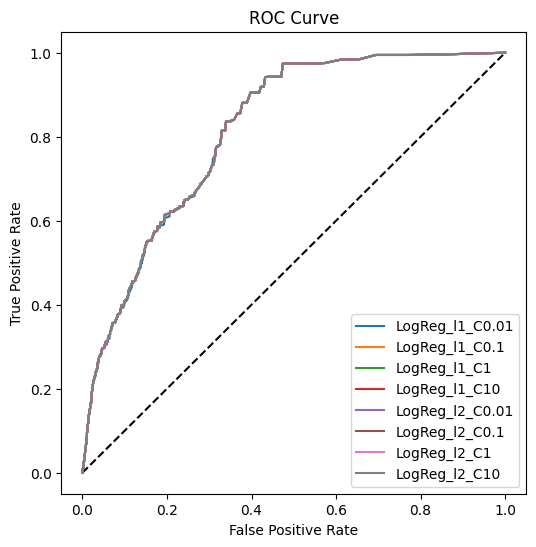

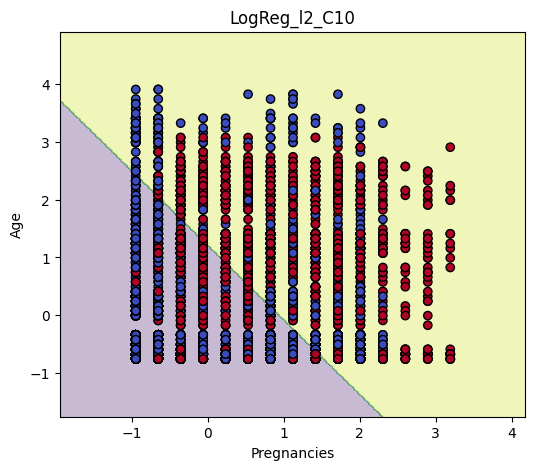


📊 Podsumowanie metryk:
             Model  F1_score       AUC
0  LogReg_l1_C0.01  0.577289  0.816045
1   LogReg_l1_C0.1  0.580928  0.816494
2     LogReg_l1_C1  0.580928  0.816493
3    LogReg_l1_C10  0.580928  0.816493
4  LogReg_l2_C0.01  0.567497  0.816493
5   LogReg_l2_C0.1  0.577289  0.816493
6     LogReg_l2_C1  0.580928  0.816493
7    LogReg_l2_C10  0.580928  0.816493


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytaj dane
diabetes = pd.read_csv('diabetes.csv')
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
            'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]


X = X[['Pregnancies', 'Age']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0, stratify=y)

# Standaryzacja
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

# Inicjalizacja globalnych zmiennych
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

# Funkcja: metryki i wizualizacje
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:, 1])

    new_row = pd.DataFrame([{
        'Model': name,
        'F1_score': f1_metric,
        'AUC': auc_metric
    }])

    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    return metrics_dataframe

# Funkcja: wizualizacja granicy decyzyjnej
def plot_classification_surface(model, X, y, title=""):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Pregnancies")
    plt.ylabel("Age")
    plt.title(title)
    plt.show()

# Testowanie różnych regularyzacji
penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10]

for penalty in penalties:
    for C in C_values:
        solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
        model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=1000)
        model.fit(X_train_standardized, y_train)

        # F1-score: train + test
        f1_train = f1_score(y_train, model.predict(X_train_standardized))
        f1_test = f1_score(y_test, model.predict(X_test_standardized))

        model_name = f"LogReg_{penalty}_C{C}"
        print(f"=== {model_name} ===")
        print(f"F1 Score (Train): {f1_train:.4f}")
        print(f"F1 Score (Test) : {f1_test:.4f}")

        # Metryki i wykresy ROC
        calculate_metrics(model, model_name, X_test_standardized, y_test)

        # Powierzchnia klasyfikacyjna (tylko na danych treningowych)
        plot_classification_surface(model, X_train_standardized, y_train, title=model_name)

# Na koniec: podsumowanie
print("\n📊 Podsumowanie metryk:")
print(metrics_dataframe)
